## Mutable vs Immutable

Objects in Python are divided into two types: mutable and immutable. Some of the **mutable** data types in Python are **list**, **dictionary**, **set** and **user-defined classes**. 
On the other hand, some of the **immutable** data types are **int**, **float**, **decimal**, **bool**, **string**, **tuple**, and **range**.

In Python, the process of assignment (=) is just:
- Create an object (of a certain value)
- Point the variable name to (reference) this object

This is like the concept of pointers in the C language, but it is more flexible that variables in Python can point to other objects (regardless of type) at any time, and other variables can also point to this object. If this object is mutable, then changes to one of the reference variables will affect other variables: 

In [1]:
lst = [1, 2, 3]
print(f'lst = {lst}')
s = lst
s.append(4)
print(f'lst = {lst}')

d = {'a': 1}
print(f'd = {d}')
e = d
d['b'] = 2
print(f'd = {d}')

lst = [1, 2, 3]
lst = [1, 2, 3, 4]
d = {'a': 1}
d = {'a': 1, 'b': 2}


If you do not deliberately want to do this (in fact, you rarely want to do this), then it may cause some unexpected errors (**especially when passing parameters to a function**). In order to solve this trouble, the easiest way is not to directly point the variable to the existing object, but to generate a new copy and assign it to the new variable. There are many syntaxes that can be implemented: 

In [3]:
from copy import copy

# Example: List
lst = [1,2,3]

# This list contains original list and copies of that list; The first item is original list.
list_of_lists = [lst,
        lst[:],
        copy(lst),
        list(lst),
        lst.copy(),
        [*lst]] # invalid in 2.7

# Add an index to each list to ensure that change occurs only in that list.
for i, v in enumerate(list_of_lists):
    v.append("#{}".format(i))
    
print(f'Original List: {lst}')
print(f'List of Lists: {list_of_lists}')

Original List: [1, 2, 3, '#0']
List of Lists: [[1, 2, 3, '#0'], [1, 2, 3, '#1'], [1, 2, 3, '#2'], [1, 2, 3, '#3'], [1, 2, 3, '#4'], [1, 2, 3, '#5']]


The speed of each method depends on the number of items in the list. I create a simple benchmark for it. Run an experiment in 50 rounds. In each round, I create a list with random strings (random length between 10 and 20) in the size of n. The average of time consumed for each method is shown in the below table in microseconds.

| Length  | lst[:]   | [*lst]   | lst.copy() | copy(lst) | list(lst) |
|---------|----------|----------|------------|-----------|-----------|
| 1       | 7.081633 | 2.142857 | 2.632653   | 5.040816  | 2.714286  |
| 10      | 6.612245 | 2.346939 | 2.204082   | 5.306122  | 2.428571  |
| 100     | 7.877551 | 2.061224 | 2.959184   | 4.755102  | 3.306122  |
| 1000    | 23.55102 | 9.081633 | 10.79592   | 10.36735  | 10.36735  |
| 10000   | 69.63265 | 79.7551  | 69.53061   | 71.63265  | 66.26531  |
| 100000  | 705.0612 | 956.9796 | 898.0612   | 860.4286  | 851.9592  |
| 1000000 | 10389.06 | 10323.43 | 10363.2    | 10265.71  | 10514.14  |

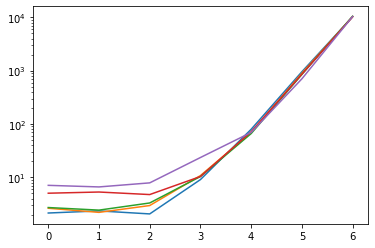

In [28]:
import matplotlib.pyplot as plt
x = [1, 10, 100, 1000, 10000, 100000, 1000000]
plt.plot([2.142857143, 2.346938776, 2.06122449, 9.081632653, 79.75510204, 956.9795918, 10323.42857]) # [*lst]
plt.plot([2.632653061,2.204081633,2.959183673,10.79591837,69.53061224,898.0612245,10363.20408]) # lst.copy()
plt.plot([2.714285714,2.428571429,3.306122449,10.36734694,66.26530612,851.9591837,10514.14286]) # list(lst)
plt.plot([5.040816327,5.306122449,4.755102041,10.36734694,71.63265306,860.4285714,10265.71429]) # copy(lst)
plt.plot([7.081632653,6.612244898,7.87755102,23.55102041,69.63265306,705.0612245,10389.06122]) # lst[:]
plt.yscale('log')

It seems there is no significant difference between methods for a large list (more than 1000). So for a clear comparison between methods, a size of more than 10000 is eliminated in the below picture.

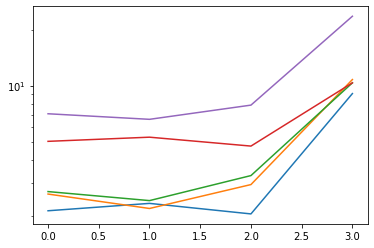

In [30]:
import matplotlib.pyplot as plt
x = [1, 10, 100, 1000, 10000, 100000, 1000000]
plt.plot([2.142857143, 2.346938776, 2.06122449, 9.081632653]) # [*lst]
plt.plot([2.632653061,2.204081633,2.959183673,10.79591837]) # lst.copy()
plt.plot([2.714285714,2.428571429,3.306122449,10.36734694]) # list(lst)
plt.plot([5.040816327,5.306122449,4.755102041,10.36734694]) # copy(lst)
plt.plot([7.081632653,6.612244898,7.87755102,23.55102041]) # lst[:]

plt.yscale('log')

The average execution time of copy methods in comparison with the fastest method for list size below 1000 are in the following table:

| Method     | Execution Time (avg) |
|:-----------|:---------------------|
| [*lst]     |           1          |
| lst.copy() |          1.2         |
| list(lst)  |         1.26         |
| copy(lst)  |           2          |
| lst[:]     |         3.13         |

Note: The measurments were performed with Python 3.9.2, Windows 10.

In [31]:
# Example: Dict
d = {"a": 0}
# This list contains original dict and copies of that dict; The first item is original dict.
list_of_dict = [d,
      d.copy(),
      {**d}] # invalid in 2.7

# Add an index to each dict to ensure that change occurs only in that dict.
for i, v in enumerate(list_of_dict):
    v['indx'] = "#{}".format(i)
    
print(f'Original Dict: {d}')
print(f'List of Dicts: {list_of_dict}')

Original Dict: {'a': 0, 'indx': '#0'}
List of Dicts: [{'a': 0, 'indx': '#0'}, {'a': 0, 'indx': '#1'}, {'a': 0, 'indx': '#2'}]


## Shallow vs Deep Copy
The copy examples given above are relatively simple, and there is no **nesting**. If the mutable object here also contains other mutable objects, what will be the result: 

In [1]:
from copy import copy

lst = [0, 1, [2, 3]]

llst = [lst,
        lst[:],
        copy(lst),
        list(lst),
        lst.copy(),
        [*lst]]

for i, v in enumerate(llst):
    v[2].append("#{}".format(i))  # Append index to internal list
    
print(lst)

d = {"a": {"b": [0]}}
dd = [d,
      d.copy(),
      {**d}]

for i, v in enumerate(dd):
    v['a']['b'].append("#{}".format(i))  # Append index to internal list
    
print(d)

[0, 1, [2, 3, '#0', '#1', '#2', '#3', '#4', '#5']]
{'a': {'b': [0, '#0', '#1', '#2']}}


These copy methods are called **shallow copy**, which is a step further than direct assignment to generate new objects, but for nested objects, assignment is still used to create; if you want to go further, you need Deep copy, provided by the standard library copy:

In [45]:
from copy import deepcopy

lst = [0, 1, [2, 3]]
lst2 = deepcopy(lst)
lst2[2].append(4)

print(f'lst = {lst}')
print(f'lst2 = {lst2}')

d = {"a": {"b": [0]}}
d2 = deepcopy(d)
d2["a"]["b"].append(1)

print(f'd = {d}')
print(f'd2 = {d2}')

lst = [0, 1, [2, 3]]
lst2 = [0, 1, [2, 3, 4]]
d = {'a': {'b': [0]}}
d2 = {'a': {'b': [0, 1]}}


## Pass Objects to Functions
**Mutable** object is called by reference in a function, so it can change the original variable itself. **Immutable** objects can be called by reference because its value cannot be changed anyways.

In [9]:
def update_list(lst):
    print(f'Inside lst = {lst},\t\tID: {id(lst)}')
    lst += [4]
    
lst = [1, 2, 3]
print(f'Before lst = {lst},\t\tID: {id(lst)}')

update_list(lst)

print(f'After  lst = {lst},\tID: {id(lst)}')

Before lst = [1, 2, 3],		ID: 2506227470144
Inside lst = [1, 2, 3],		ID: 2506227470144
After  lst = [1, 2, 3, 4],	ID: 2506227470144


As we can see from the above example, we have called the list via **call by reference**, so the changes are made to the original list itself.

In [47]:
def update_number(n):
    n += 10
    print(f'n = {n},\tID: {id(n)}')
    
m = 5

print(f'm = {m},\tID: {id(m)}')

update_number(m)

print(f'm = {m},\tID: {id(m)}')

m = 5,	ID: 140714621035280
n = 15,	ID: 140714621035600
m = 5,	ID: 140714621035280


## Exceptions in immutability
Not all of the immutable objects are actually immutable!

Python containers liked tuples are immutable. That means value of a <code>tuple</code> can't be changed after it is created. But the "value" of a tuple is infact a sequence of names with unchangeable bindings to objects. **The key thing to note is that the bindings are unchangeable, not the objects they are bound to.**

In [1]:
t = ('Gandalf', [1, 2, 3])
print(t)
t[1].append(4)
print(t)

('Gandalf', [1, 2, 3])
('Gandalf', [1, 2, 3, 4])


## References
- [Python Docs: Shallow and deep copy operations](https://docs.python.org/3/library/copy.html)